In [1]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import numpy as np
import time
import lightgbm as lgb
import datetime
import time

from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold,GroupKFold,StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
ID_52_2020_0809 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/ID_52_2020_0809.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_52_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_052_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_85_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_085_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_86_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_086_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_45_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_045_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_70_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_070_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_133_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_133_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_134_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_134_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_135_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_135_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_136_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_136_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_137_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_137_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_138_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_138_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')

In [3]:
###目标变量
TREE_1 = pd.DataFrame()
TREE_1 = ID_52_2020_0809
TREE_1.rename(columns = {'TagValue':'TagValue_52'}, inplace=True)


###特征合并函数
def zusammen(data,TREE_1):
    data = data[(data['CreateDateTime']>'2020-08-05 00:00:00')&(data['CreateDateTime']<'2020-08-20 00:00:00')]
    data = data.drop('TagId',axis = 1) 
    TREE_1 = TREE_1.set_index('CreateDateTime').join(data.set_index('CreateDateTime'),lsuffix = '_l', rsuffix = '_r',how = 'outer')
    TREE_1 = TREE_1.reset_index('CreateDateTime')
#     TREE_1 = TREE_1.fillna(method = "ffill")
    return TREE_1


###合并特征
TREE_1 = zusammen(ID_85_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_85'}, inplace=True)
TREE_1 = zusammen(ID_45_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_45'}, inplace=True)
TREE_1 = zusammen(ID_70_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_70'}, inplace=True)
TREE_1 = zusammen(ID_86_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_86'}, inplace=True)
TREE_1 = zusammen(ID_133_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_133'}, inplace=True)
TREE_1 = zusammen(ID_134_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_134'}, inplace=True)
TREE_1 = zusammen(ID_135_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_135'}, inplace=True)
TREE_1 = zusammen(ID_136_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_136'}, inplace=True)
TREE_1 = zusammen(ID_137_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_137'}, inplace=True)
TREE_1 = zusammen(ID_138_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_138'}, inplace=True)
TREE_1['TagValue_85'] = TREE_1['TagValue_85'].fillna(method = "ffill")
TREE_1['TagValue_86'] = TREE_1['TagValue_86'].fillna(method = "ffill")
TREE_1['TagValue_45'] = TREE_1['TagValue_45'].fillna(method = "ffill")
TREE_1['TagValue_70'] = TREE_1['TagValue_70'].fillna(method = "ffill")
TREE_1['TagValue_133'] = TREE_1['TagValue_133'].fillna(method = "ffill")
TREE_1['TagValue_134'] = TREE_1['TagValue_134'].fillna(method = "ffill")
TREE_1['TagValue_135'] = TREE_1['TagValue_135'].fillna(method = "ffill")
TREE_1['TagValue_136'] = TREE_1['TagValue_136'].fillna(method = "ffill")
TREE_1['TagValue_137'] = TREE_1['TagValue_137'].fillna(method = "ffill")
TREE_1['TagValue_138'] = TREE_1['TagValue_138'].fillna(method = "ffill")
TREE_1['diff_float'] = TREE_1['CreateDateTime'].diff().dt.total_seconds()


###对过长停机时间做判断
TREE_1.loc[TREE_1['diff_float'] > 1800]

def NaNjgtc(data):
#     columns = [col for col in data.columns if col in ['CreateDateTime', 'TagValue_51', 'diff_float']]
#     X = TREE_1[columns]
#     X.isnull().sum()
#     X.loc[(X['diff_float'] > 1800)]
    data.loc[(data['diff_float'] > 1800),'TagValue_52'] = data.loc[(data['diff_float'] > 1800),'TagValue_52'].fillna(0)
#     X.loc[(X['diff_float'] > 1800)]
#     X.isnull().sum()
    return data

TREE_2 = NaNjgtc(TREE_1)


###构建新特征
TREE_2['TagValue_52'] = TREE_2['TagValue_52'].fillna(method = "ffill")
TREE_2 = TREE_2.drop('TagId',axis = 1)
TREE_2['TagValue_133_lag1'] = TREE_2['TagValue_133'].shift(1)
TREE_2['TagValue_133_lag2'] = TREE_2['TagValue_133'].shift(2)
TREE_2['TagValue_134_lag1'] = TREE_2['TagValue_134'].shift(1)
TREE_2['TagValue_134_lag2'] = TREE_2['TagValue_134'].shift(2)
TREE_2['TagValue_135_lag1'] = TREE_2['TagValue_135'].shift(1)
TREE_2['TagValue_135_lag2'] = TREE_2['TagValue_135'].shift(2)
TREE_2['TagValue_136_lag1'] = TREE_2['TagValue_136'].shift(1)
TREE_2['TagValue_136_lag2'] = TREE_2['TagValue_136'].shift(2)
TREE_2['TagValue_137_lag1'] = TREE_2['TagValue_137'].shift(1)
TREE_2['TagValue_137_lag2'] = TREE_2['TagValue_137'].shift(2)
TREE_2['TagValue_138_lag1'] = TREE_2['TagValue_138'].shift(1)
TREE_2['TagValue_138_lag2'] = TREE_2['TagValue_138'].shift(2)
# TREE_2['diff_52'] = TREE_2['TagValue_52'].diff()

gh = pd.DataFrame()
gh['CreateDateTime'] = ID_85_2020['CreateDateTime']
gh['CreateDateTime_0'] = ID_85_2020['CreateDateTime']
gh['TagValue'] = ID_85_2020['TagValue']
gh['TagId'] = ID_85_2020['TagId']

TREE_2 = zusammen(gh,TREE_2)
TREE_2['CreateDateTime_0'] = TREE_2['CreateDateTime_0'].fillna(method = "ffill")
TREE_2 = TREE_2.drop('TagValue',axis = 1)
TREE_2['deltatime'] = TREE_2['CreateDateTime'] - TREE_2['CreateDateTime_0'] 
TREE_2['deltatime'] = TREE_2['deltatime'].dt.total_seconds()
TREE_2=TREE_2.copy()
TREE_2['timestamp'] = TREE_2['CreateDateTime'].values.astype(np.int64) // 10 ** 6 
TREE_2 = TREE_2.dropna()
TREE_2

,CreateDateTime,TagValue_52,TagValue_85,TagValue_45,TagValue_70,TagValue_86,TagValue_133,TagValue_134,TagValue_135,TagValue_136,...,TagValue_135_lag2,TagValue_136_lag1,TagValue_136_lag2,TagValue_137_lag1,TagValue_137_lag2,TagValue_138_lag1,TagValue_138_lag2,CreateDateTime_0,deltatime,timestamp
1768,2020-08-05 00:12:29.444,3.964120,1.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-08-05 00:06:37.410,352.034,1596586349444
1769,2020-08-05 00:12:30.258,3.935185,1.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-08-05 00:06:37.410,352.848,1596586350258
1770,2020-08-05 00:12:30.469,3.964120,1.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-08-05 00:06:37.410,353.059,1596586350469
1771,2020-08-05 00:12:30.678,3.935185,1.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-08-05 00:06:37.410,353.268,1596586350678
1772,2020-08-05 00:12:31.283,3.964120,1.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-08-05 00:06:37.410,353.873,1596586351283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2624218,2020-08-19 23:59:59.012,4.629630,1.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-08-19 23:57:34.905,144.107,1597881599012
2624219,2020-08-19 23:59:59.218,4.542824,1.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-08-19 23:57:34.905,144.313,1597881599218
2624220,2020-08-19 23:59:59.424,4.513889,1.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-08-19 23:57:34.905,144.519,1597881599424
2624221,2020-08-19 23:59:59.632,4.456018,1.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-08-19 23:57:34.905,144.727,1597881599632


In [4]:
TREE_2 = TREE_2.reset_index(drop=True)
TREE_2.isnull().sum()

CreateDateTime       0
TagValue_52          0
TagValue_85          0
TagValue_45          0
TagValue_70          0
TagValue_86          0
TagValue_133         0
TagValue_134         0
TagValue_135         0
TagValue_136         0
TagValue_137         0
TagValue_138         0
diff_float           0
TagValue_133_lag1    0
TagValue_133_lag2    0
TagValue_134_lag1    0
TagValue_134_lag2    0
TagValue_135_lag1    0
TagValue_135_lag2    0
TagValue_136_lag1    0
TagValue_136_lag2    0
TagValue_137_lag1    0
TagValue_137_lag2    0
TagValue_138_lag1    0
TagValue_138_lag2    0
CreateDateTime_0     0
deltatime            0
timestamp            0
dtype: int64

In [ ]:
# coding: utf-8
from sklearn.model_selection import GridSearchCV

# 加载数据
print('加载数据...')
columns = [col for col in TREE_2.columns if col not in ['CreateDateTime_0','CreateDateTime','timestamp', 'TagValue_52']]
X = TREE_2[columns]
y = TREE_2['TagValue_52']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

print('开始训练...')
# 直接初始化LGBMRegressor
# 这个LightGBM的Regressor和sklearn中其他Regressor基本是一致的
gbm = lgb.LGBMRegressor(objective='regression',
                        num_leaves=31,
                        learning_rate=1,
                        n_estimators=40)

# 使用fit函数拟合
gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='l1',
        early_stopping_rounds=5)

# 预测
print('开始预测...')
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)
# 评估预测结果
print('预测结果的rmse是:')
print(mean_squared_error(y_test, y_pred) ** 0.5)

In [ ]:
# 配合scikit-learn的网格搜索交叉验证选择最优超参数
estimator = lgb.LGBMRegressor(num_leaves=31)

param_grid = {
    'learning_rate': [0.01, 0.1, 1],
    'n_estimators': [20, 40]
}

gbm = GridSearchCV(estimator, param_grid)

gbm.fit(X_train, y_train)

print('用网格搜索找到的最优超参数为:')
print(gbm.best_params_)

In [ ]:
X_test['y_pred'] = y_pred
X_test

In [ ]:
right = TREE_2['CreateDateTime']
right

In [68]:
left = X_test
left

,TagValue_85,TagValue_45,TagValue_70,TagValue_86,TagValue_133,TagValue_134,TagValue_135,TagValue_136,TagValue_137,TagValue_138,...,TagValue_135_lag1,TagValue_135_lag2,TagValue_136_lag1,TagValue_136_lag2,TagValue_137_lag1,TagValue_137_lag2,TagValue_138_lag1,TagValue_138_lag2,deltatime,y_pred
2514379,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,326.418,4.049635
1135635,0.0,0.0,89.797974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,505.570,2.683541
41079,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,351.426,2.693357
888055,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5099.949,2.761239
1505855,1.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,217.874,4.141367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402327,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,412.767,4.046425
549416,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,252.089,4.061881
2595764,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,91.508,4.907856
1156412,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,141.888,4.061881


In [69]:
result = pd.merge(left, right, how='left', left_index=True, right_index=True)
result

,TagValue_85,TagValue_45,TagValue_70,TagValue_86,TagValue_133,TagValue_134,TagValue_135,TagValue_136,TagValue_137,TagValue_138,...,TagValue_135_lag2,TagValue_136_lag1,TagValue_136_lag2,TagValue_137_lag1,TagValue_137_lag2,TagValue_138_lag1,TagValue_138_lag2,deltatime,y_pred,CreateDateTime
2514379,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,326.418,4.049635,2020-08-19 10:44:07.349
1135635,0.0,0.0,89.797974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,505.570,2.683541,2020-08-11 20:36:16.730
41079,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,351.426,2.693357,2020-08-05 05:19:51.041
888055,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5099.949,2.761239,2020-08-10 14:28:38.013
1505855,1.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,217.874,4.141367,2020-08-13 21:34:21.895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402327,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,412.767,4.046425,2020-08-06 23:05:01.832
549416,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,252.089,4.061881,2020-08-08 19:16:16.619
2595764,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,91.508,4.907856,2020-08-19 20:49:33.237
1156412,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,141.888,4.061881,2020-08-11 23:02:29.825


In [70]:
result['y_test'] = y_test
result

,TagValue_85,TagValue_45,TagValue_70,TagValue_86,TagValue_133,TagValue_134,TagValue_135,TagValue_136,TagValue_137,TagValue_138,...,TagValue_136_lag1,TagValue_136_lag2,TagValue_137_lag1,TagValue_137_lag2,TagValue_138_lag1,TagValue_138_lag2,deltatime,y_pred,CreateDateTime,y_test
2514379,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,326.418,4.049635,2020-08-19 10:44:07.349,4.108796
1135635,0.0,0.0,89.797974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,505.570,2.683541,2020-08-11 20:36:16.730,2.719908
41079,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,351.426,2.693357,2020-08-05 05:19:51.041,2.633102
888055,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5099.949,2.761239,2020-08-10 14:28:38.013,2.748842
1505855,1.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,217.874,4.141367,2020-08-13 21:34:21.895,4.253472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402327,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,412.767,4.046425,2020-08-06 23:05:01.832,3.877315
549416,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,252.089,4.061881,2020-08-08 19:16:16.619,3.877315
2595764,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,91.508,4.907856,2020-08-19 20:49:33.237,4.774305
1156412,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,141.888,4.061881,2020-08-11 23:02:29.825,4.079861


In [71]:
result = result.sort_values(by=['CreateDateTime'])
result

,TagValue_85,TagValue_45,TagValue_70,TagValue_86,TagValue_133,TagValue_134,TagValue_135,TagValue_136,TagValue_137,TagValue_138,...,TagValue_136_lag1,TagValue_136_lag2,TagValue_137_lag1,TagValue_137_lag2,TagValue_138_lag1,TagValue_138_lag2,deltatime,y_pred,CreateDateTime,y_test
12,1.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,357.981,4.204416,2020-08-05 00:12:35.391,3.964120
14,1.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,359.008,4.200113,2020-08-05 00:12:36.418,3.964120
15,1.0,1.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,359.211,4.346739,2020-08-05 00:12:36.621,4.774305
16,1.0,1.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,359.417,4.906141,2020-08-05 00:12:36.827,4.947917
18,1.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,359.834,4.229461,2020-08-05 00:12:37.244,3.935185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2622405,1.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,123.809,4.149519,2020-08-19 23:59:38.714,4.542824
2622407,1.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,124.221,4.149519,2020-08-19 23:59:39.126,4.369213
2622416,1.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,128.521,4.130803,2020-08-19 23:59:43.426,4.398148
2622437,1.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,140.193,4.828829,2020-08-19 23:59:55.098,5.237268


(0.5, 6.0)

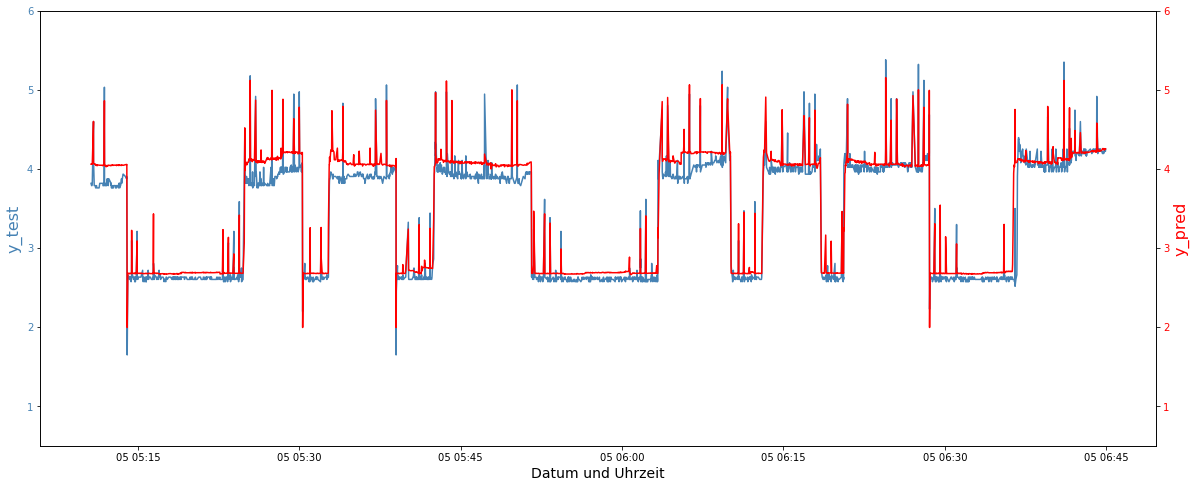

In [72]:
Daten_1 = result


Daten_1 = Daten_1[(Daten_1['CreateDateTime']>'2020-08-05 05:10:37')&(Daten_1['CreateDateTime']<'2020-08-05 06:45:00')]


fig, ax = plt.subplots(figsize=(20, 8))
col1 = 'steelblue'
col2 = 'red'
col3='black'
col4='green'
col5='magenta'
col6='cyan'


ax.set_xlabel('Datum und Uhrzeit', fontsize=14)
ax.set_ylabel('y_test', color=col1, fontsize=16)
ax.plot(Daten_1.CreateDateTime, Daten_1.y_test, color=col1)
ax.tick_params(axis='y', labelcolor=col1)
plt.ylim((0.5, 6))


ax2 = ax.twinx()
ax2.set_ylabel('y_pred', color=col2, fontsize=16)
ax2.plot(Daten_1.CreateDateTime, Daten_1.y_pred, color=col2)
ax2.tick_params(axis='y', labelcolor=col2)
plt.ylim((0.5, 6))

In [6]:
columns = [col for col in TREE_2.columns if col not in ['CreateDateTime_0','CreateDateTime','timestamp', 'TagValue_52']]
columns

['TagValue_85',
 'TagValue_45',
 'TagValue_70',
 'TagValue_86',
 'TagValue_133',
 'TagValue_134',
 'TagValue_135',
 'TagValue_136',
 'TagValue_137',
 'TagValue_138',
 'diff_float',
 'TagValue_133_lag1',
 'TagValue_133_lag2',
 'TagValue_134_lag1',
 'TagValue_134_lag2',
 'TagValue_135_lag1',
 'TagValue_135_lag2',
 'TagValue_136_lag1',
 'TagValue_136_lag2',
 'TagValue_137_lag1',
 'TagValue_137_lag2',
 'TagValue_138_lag1',
 'TagValue_138_lag2',
 'deltatime']

Loading data...
Starting training...
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.088841 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[1]	training's rmse: 0.667406	training's auc: 0.998928	valid_1's rmse: 0.667295	valid_1's auc: 0.998928
[2]	training's rmse: 0.610804	training's auc: 0.999084	valid_1's rmse: 0.61067	valid_1's auc: 0.999092
[3]	training's rmse: 0.554613	training's auc: 0.999084	valid_1's rmse: 0.554477	valid_1's auc: 0.999092
[4]	training's rmse: 0.524125	training's auc: 0.999054	valid_1's rmse: 0.524004	valid_1's auc: 0.998955
[5]	training's rmse: 0.498085	training's auc: 0.999049	valid_1's rmse: 0.497981	valid_1's auc: 0.998945
[6]	training's rmse: 0.459631	training's auc: 0.999056	valid_1's rmse: 0.459485	valid_1's auc: 0.998954
[7]	training's rmse: 0.420508	training's auc: 0.99906	valid_1's rmse: 0.420337	valid_1's auc: 0.998959
[8]	trai

[77]	training's rmse: 0.16276	training's auc: 0.999125	valid_1's rmse: 0.161817	valid_1's auc: 0.999107
[78]	training's rmse: 0.162739	training's auc: 0.999125	valid_1's rmse: 0.161794	valid_1's auc: 0.999107
[79]	training's rmse: 0.162682	training's auc: 0.999125	valid_1's rmse: 0.161732	valid_1's auc: 0.999107
[80]	training's rmse: 0.162658	training's auc: 0.999125	valid_1's rmse: 0.161702	valid_1's auc: 0.999107
[81]	training's rmse: 0.16263	training's auc: 0.999094	valid_1's rmse: 0.161683	valid_1's auc: 0.999159
[82]	training's rmse: 0.162611	training's auc: 0.99913	valid_1's rmse: 0.161675	valid_1's auc: 0.999107
[83]	training's rmse: 0.162586	training's auc: 0.999129	valid_1's rmse: 0.161655	valid_1's auc: 0.999107
[84]	training's rmse: 0.162566	training's auc: 0.999128	valid_1's rmse: 0.161638	valid_1's auc: 0.999103
[85]	training's rmse: 0.162535	training's auc: 0.999149	valid_1's rmse: 0.161605	valid_1's auc: 0.999102
[86]	training's rmse: 0.162521	training's auc: 0.999149	va

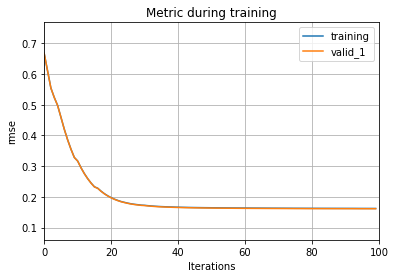

Plotting feature importances...


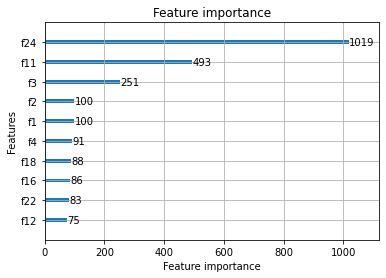

Plotting 4th tree...


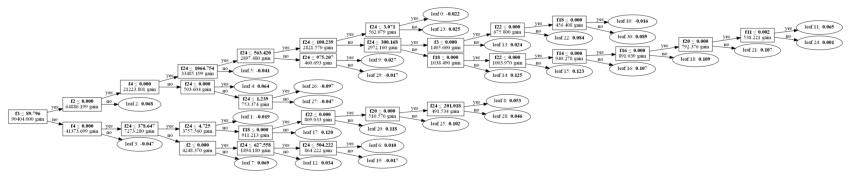

Plotting 4th tree with graphviz...
保存模型...
开始预测...
预估结果的rmse为:
0.16130704724717623


In [13]:
from pathlib import Path

import pandas as pd

import lightgbm as lgb

if lgb.compat.MATPLOTLIB_INSTALLED:
    import matplotlib.pyplot as plt
else:
    raise ImportError('You need to install matplotlib and restart your session for plot_example.py.')

print('Loading data...')
X = TREE_2[columns]
y = TREE_2['TagValue_52']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train)

# specify your configurations as a dict
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'rmse', 'auc'},
#     'max_depth': 6,
    'num_leaves': 31,
    'learning_rate': 0.1,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

evals_result = {}  # to record eval results for plotting

print('Starting training...')
# train
gbm = lgb.train(
    params,
    lgb_train,
    num_boost_round=100,
    valid_sets=[lgb_train, lgb_test],
    feature_name=[f'f{i + 1}' for i in range(X_train.shape[-1])],
    callbacks=[
        lgb.record_evaluation(evals_result)
    ]
)

print('Plotting metrics recorded during training...')#画出训练结果
ax = lgb.plot_metric(evals_result, metric='rmse')
plt.show()

print('Plotting feature importances...')#画特征重要性排序
ax = lgb.plot_importance(gbm, max_num_features=10)
plt.show()

# print('Plotting split value histogram...')
# ax = lgb.plot_split_value_histogram(gbm, feature='f24', bins='auto')
# plt.show()

print('Plotting 4th tree...')  # 画出决策树，其中的第4颗
ax = lgb.plot_tree(gbm, tree_index=3, figsize=(15, 15), show_info=['split_gain'])
plt.show()

print('Plotting 4th tree with graphviz...')#导出决策树的pdf图像到本地
graph = lgb.create_tree_digraph(gbm, tree_index=3, name='Tree4')
graph.render(view=True)


# 保存模型
print('保存模型...')
# 保存模型到文件中
gbm.save_model('model.txt')

print('开始预测...')
# 预测
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
# 评估
print('预估结果的rmse为:')
print(mean_squared_error(y_test, y_pred) ** 0.5)

Plotting 4th tree...


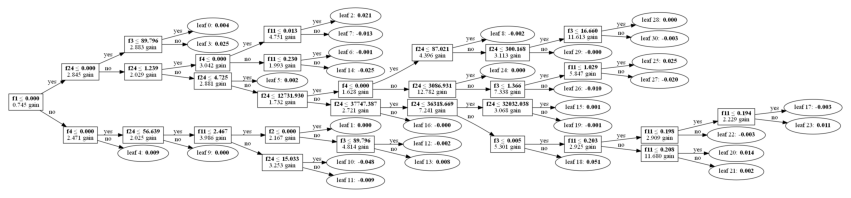

In [14]:
print('Plotting 4th tree...')  # 画出决策树，其中的第4颗
ax = lgb.plot_tree(gbm, tree_index=93, figsize=(15, 15), show_info=['split_gain'])
plt.show()

In [ ]:
params = {
    'boosting_type': 'gbdt', 
    'objective': 'regression', 

    'learning_rate': 0.1,
    'max_depth': 6,
    'num_leaves': 31, 

    'subsample': 0.9, 
    'colsample_bytree': 0.8, 
    }

In [9]:
data_train = lgb.Dataset(X_train, y_train, silent=True)
cv_results = lgb.cv(
    params, data_train, num_boost_round=1000, nfold=5, stratified=False, shuffle=True, metrics='rmse',
    early_stopping_rounds=50, verbose_eval=50, show_stdv=True, seed=0)

print('best n_estimators:', len(cv_results['rmse-mean']))
print('best cv score:', cv_results['rmse-mean'][-1])

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.077487 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_lea

In [10]:
from sklearn.model_selection import GridSearchCV
### 我们可以创建lgb的sklearn模型，使用上面选择的(学习率，评估器数目)
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=50,
                              learning_rate=0.1, n_estimators=658, max_depth=6,
                              metric='rmse', bagging_fraction = 0.8,feature_fraction = 0.8)

params_test1={
    'max_depth': range(3,8,2),
    'num_leaves':range(30, 170, 30)
}
gsearch1 = GridSearchCV(estimator=model_lgb, param_grid=params_test1, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=4)

In [12]:
gsearch1.fit(X_train, y_train)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

Fitting 5 folds for each of 15 candidates, totalling 75 fits


({'mean_fit_time': array([54.33246183, 62.09008422, 62.51721845, 64.70394812, 57.49651146,
         72.62355456, 72.47612987, 71.66100492, 72.98710489, 72.35686908,
         63.06642385, 73.22585769, 81.20772004, 81.79421854, 74.56216564]),
  'std_fit_time': array([1.90679137, 3.53224913, 3.15748165, 3.19730099, 0.7335448 ,
         1.38655184, 2.74557235, 3.43441359, 4.26736159, 2.80788373,
         3.5833633 , 2.04230313, 4.47996629, 2.70348484, 8.36773755]),
  'mean_score_time': array([10.66481414, 12.787637  , 12.16178246, 11.75383282, 11.3068418 ,
         17.73625278, 17.82033882, 18.21585469, 18.66942916, 18.0858634 ,
         15.55896468, 24.57637072, 29.9521327 , 29.74860659, 25.02143979]),
  'std_score_time': array([0.61297707, 0.64432069, 0.32351026, 0.10448745, 0.5520979 ,
         0.92430592, 0.86267698, 1.0559586 , 1.09751865, 1.06082314,
         0.76925286, 0.90366698, 1.73093138, 1.22367789, 4.76838994]),
  'param_max_depth': masked_array(data=[3, 3, 3, 3, 3, 5, 5, 5, 